In [5]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### [MovieLens movie ratings dataset:](https://grouplens.org/datasets/movielens/100k/) 100,000 ratings from 1000 users on 1700 movies. 

In [6]:
data = pd.read_csv('Datasets/movies_demo.txt', sep='\t', index_col=0)
data.head()

,Lady in the Water,Snakes on a Plane,Just my luck,Superman Returns,The Night Listener,"You, Me and Dupree (target)"
Index,,,,,,
Lisa,2.5,3.5,3.0,3.5,3.0,2.5
Gene,3.0,3.5,1.5,5.0,3.5,3.0
Mike,2.5,3.0,2.4,3.5,4.0,2.4
Claudia,2.8,3.5,3.0,4.0,4.5,2.5
Mick,3.0,4.0,2.0,3.0,3.0,2.0


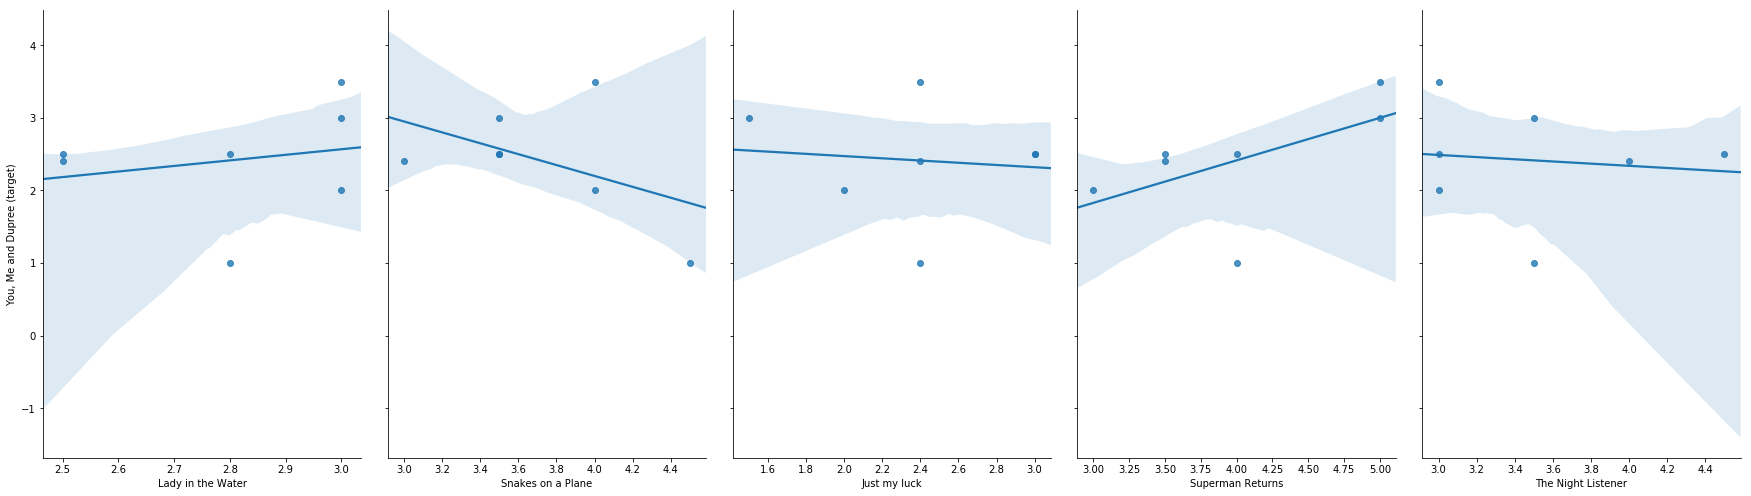

In [7]:
# Visualize the relationship between features and response
%matplotlib inline

sns.pairplot(data, x_vars=['Lady in the Water','Snakes on a Plane','Just my luck', 'Superman Returns', 'The Night Listener'], y_vars='You, Me and Dupree (target)', height=7, aspect=0.7, kind='reg')


### Preparing X and y using Pandas

In [8]:
# features matrix X
feature_cols = ['Lady in the Water','Snakes on a Plane','Just my luck', 'Superman Returns', 'The Night Listener']
X = data[feature_cols]

# response vector y
y = data['You, Me and Dupree (target)']

# split X and y into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Linear regression with scikit-learn

In [9]:
linreg = LinearRegression()

# fit the model to the training data (learn coefficients)
linreg.fit(X, y)

# pair the features with the coefficients
zipped = list(zip(feature_cols, linreg.coef_))
print(zipped)

# make predictions on the test set
y_pred = linreg.predict(X)

[('Lady in the Water', 2.7377472055030077), ('Snakes on a Plane', -1.806992505128604), ('Just my luck', 0.8395847015253796), ('Superman Returns', 0.5155835099288426), ('The Night Listener', -0.7637436442542703)]


### Model Evaluation

In [10]:
# example true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [11]:
## Mean Absolute Error: the mean of the absolute value of errors

# MAE example by hand
print((10 + 0 + 20 + 10)/4)

# MAE example using sk-learn
print(metrics.mean_absolute_error(true, pred))

# Computing real MAE for our Sales predictions
print(metrics.mean_absolute_error(y, y_pred))

10.0
10.0
0.08599941774260136


In [12]:
## Mean Squared Error: the mean of the squared errors

# MSE example by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# MSE example using sk-learn
print(metrics.mean_squared_error(true, pred))

# Computing real MSE for our Sales predictions
print(metrics.mean_squared_error(y, y_pred))

150.0
150.0
0.010549928571912134


In [13]:
## Root Mean Squared Error: the sqr. root of mean of the squared errors

# RMSE example by hand
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# RMSE example using sk-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

# Computing real RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

12.24744871391589
12.24744871391589
0.10271284521379073


* MAE: easiest to understand, it's the average error
* MSE: more popular than MAE because it "punishes" larger errors
* RMSE: even more popular than MSE because it's in "y" units